In [1]:
import numpy as np
from skimage import io
import rioxarray
import matplotlib.pyplot as plt
from sklearn.svm import SVC


#img = io.imread('https://i.stack.imgur.com/TFOv7.png')
#img = io.imread('procida.tif')
img = rioxarray.open_rasterio("procida_RGB.tif")

#rows, cols, bands = img.shape
bands, rows, cols = img.shape
classes = {'buildings': 0, 'vegetation': 1, 'water': 2}
n_classes = len(classes)
palette = np.uint8([[255, 0, 0], [0, 255, 0], [0, 0, 255]])
img_t=img.transpose("y","x","band")
img_t

<xarray.DataArray (y: 889, x: 889, band: 4)>
[3161284 values with dtype=uint8]
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 4.14e+05 4.14e+05 4.14e+05 ... 4.229e+05 4.229e+05
  * y            (y) float64 4.516e+06 4.516e+06 ... 4.508e+06 4.508e+06
    spatial_ref  int32 0
Attributes:
    scale_factor:  1.0
    add_offset:    0.0

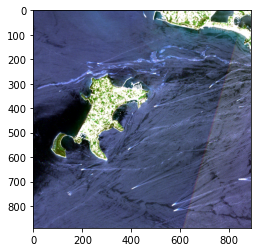

In [2]:
#io.imshow(img)
plt.imshow(img_t)

In [3]:
X = img_t.data.reshape(rows*cols, bands)
len(X)

790321

In [4]:
supervised = n_classes*np.ones(shape=(rows, cols), dtype=np.uint8)

#supervised[200:220, 150:170] = classes['building']
#supervised[40:60, 40:60] = classes['vegetation']
#supervised[100:120, 200:220] = classes['water']

supervised[467:474,262:270] = classes['buildings']
supervised[463:470,216:230] = classes['buildings']
supervised[323:331,331:351] = classes['buildings']
supervised[516:524,231:243] = classes['buildings']
supervised[412:417,234:244] = classes['buildings']

supervised[537:543,96:102] = classes['vegetation']
supervised[573:581,101:120] = classes['vegetation']
supervised[359:363,225:230] = classes['vegetation']
supervised[48:61,676:691] = classes['vegetation']
supervised[48:55,622:635] = classes['vegetation']
supervised[36:45,691:701] = classes['vegetation']
supervised[506:511,110:123] = classes['vegetation']
supervised[366:373,231:241] = classes['vegetation']

supervised[414:469,442:537] = classes['water']
supervised[183:315,27:162] = classes['water']
supervised[430:472,43:115] = classes['water']

In [5]:
y = supervised.ravel()
len(y)

790321

## Perform SVM with gamma='auto' classifier 

In [6]:
train = np.flatnonzero(supervised < n_classes)
test = np.flatnonzero(supervised == n_classes)

In [45]:
clf = SVC(gamma='auto')
clf.fit(X[train], y[train])
y[test] = clf.predict(X[test])
supervised = y.reshape(rows, cols)

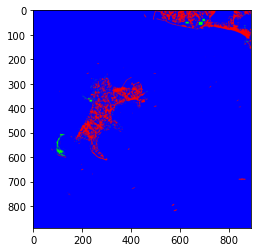

In [47]:
plt.imshow(palette[supervised])

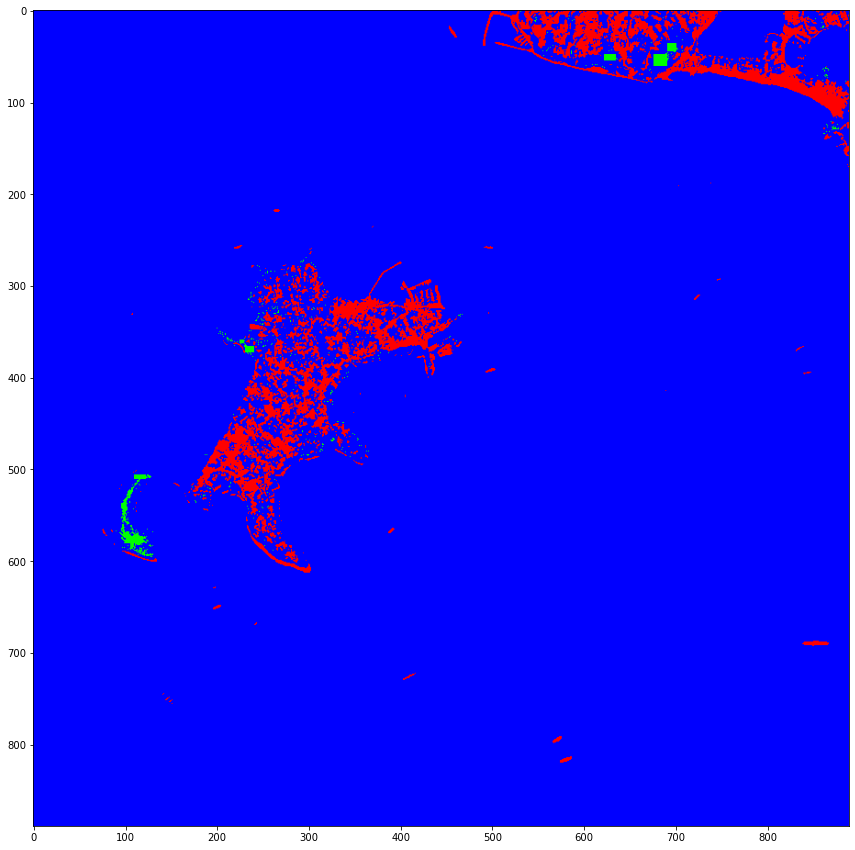

In [46]:

fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(111)
ax.imshow(palette[supervised])
plt.show()

## Perform SVM with kernel='linear' classifier 

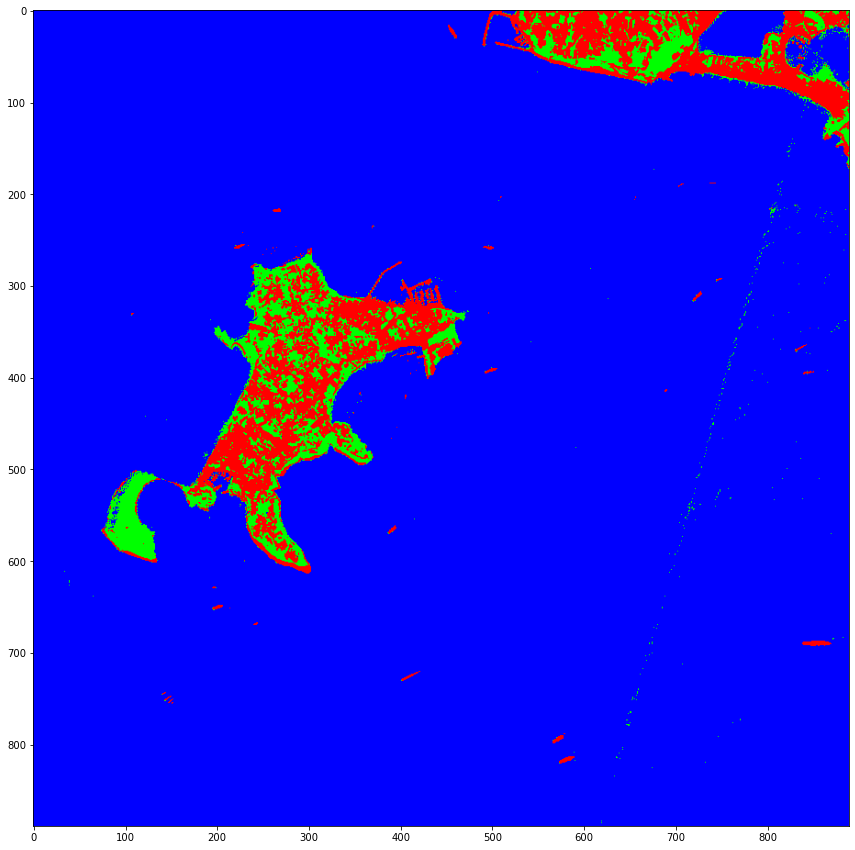

In [7]:
clf = SVC(kernel='linear')
clf.fit(X[train], y[train])
y[test] = clf.predict(X[test])
supervised = y.reshape(rows, cols)

fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(111)
ax.imshow(palette[supervised])
plt.show()